In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_rows', 1000)

In [38]:
# orders_cl.csv
url = "https://drive.google.com/file/d/13b2ZrooQwIwTpehF_SF8nZyx6drvpTcy/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orders = pd.read_csv(path)
df_orders = orders.copy()

# orderlines_cl.csv
url = "https://drive.google.com/file/d/1fOFkGAyJh3yY2YyS6h15ddN-2qpGcuo_/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orderlines = pd.read_csv(path)
df_orderlines = orderlines.copy()

# products_cl.csv
url = "https://drive.google.com/file/d/1jk0ltWrQ9S0l9cOC_o7Mh75NuF-jw1wF/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
products = pd.read_csv(path)
df_products = products.copy()

# brands_cl.csv
url = "https://drive.google.com/file/d/1VerDenpo5QvQOa6tMytwFXmkJOnNnlpx/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
brands = pd.read_csv(path)
df_brands = brands.copy()

We have:
* no duplicates
* orders only with Completed status


In [39]:
#checking again data types and changing where needed
df_orderlines.info()
df_orderlines['date'] = pd.to_datetime(df_orderlines['date'])
df_orders['created_date'] = pd.to_datetime(df_orders['created_date'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55320 entries, 0 to 55319
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                55320 non-null  int64  
 1   order_id          55320 non-null  int64  
 2   product_quantity  55320 non-null  int64  
 3   sku               55320 non-null  object 
 4   unit_price        55320 non-null  float64
 5   date              55320 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 2.5+ MB


In [40]:
#Create the unit_price_total (revenue) as orderlines.unit_price * orderlines.product_quantity, it shows us the Revenue
df_orderlines.loc[:,'revenue']=df_orderlines['product_quantity'] * df_orderlines['unit_price']
df_orderlines

,id,order_id,product_quantity,sku,unit_price,date,revenue
0,1119116,299545,1,OWC0100,47.49,2017-01-01 01:46:16,47.49
1,1119119,299546,1,IOT0014,18.99,2017-01-01 01:50:34,18.99
2,1119120,295347,1,APP0700,72.19,2017-01-01 01:54:11,72.19
3,1119134,299556,1,CRU0039-A,60.90,2017-01-01 02:20:14,60.90
4,1119145,299561,1,PEB0015,142.49,2017-01-01 02:38:50,142.49
...,...,...,...,...,...,...,...
55315,1649474,525664,1,TUC0207,16.52,2018-03-14 11:45:05,16.52
55316,1649512,527070,2,APP0698,9.99,2018-03-14 11:49:01,19.98
55317,1649522,527074,2,APP0698,9.99,2018-03-14 11:49:36,19.98
55318,1649565,527096,3,APP0698,9.99,2018-03-14 11:54:35,29.97


In [41]:
# merging orderlines and orders to see the original price
df_orderlines = df_orderlines.merge(df_products[['sku', 'price']], how='left',left_on='sku', right_on='sku')
df_orderlines

,id,order_id,product_quantity,sku,unit_price,date,revenue,price
0,1119116,299545,1,OWC0100,47.49,2017-01-01 01:46:16,47.49,60.99
1,1119119,299546,1,IOT0014,18.99,2017-01-01 01:50:34,18.99,22.95
2,1119120,295347,1,APP0700,72.19,2017-01-01 01:54:11,72.19,89.00
3,1119134,299556,1,CRU0039-A,60.90,2017-01-01 02:20:14,60.90,76.99
4,1119145,299561,1,PEB0015,142.49,2017-01-01 02:38:50,142.49,299.99
...,...,...,...,...,...,...,...,...
55315,1649474,525664,1,TUC0207,16.52,2018-03-14 11:45:05,16.52,24.99
55316,1649512,527070,2,APP0698,9.99,2018-03-14 11:49:01,19.98,25.00
55317,1649522,527074,2,APP0698,9.99,2018-03-14 11:49:36,19.98,25.00
55318,1649565,527096,3,APP0698,9.99,2018-03-14 11:54:35,29.97,25.00


In [42]:
#add column for original price total
df_orderlines.loc[:,'original_price_total']=df_orderlines['price'] * df_orderlines['product_quantity']
df_orderlines

,id,order_id,product_quantity,sku,unit_price,date,revenue,price,original_price_total
0,1119116,299545,1,OWC0100,47.49,2017-01-01 01:46:16,47.49,60.99,60.99
1,1119119,299546,1,IOT0014,18.99,2017-01-01 01:50:34,18.99,22.95,22.95
2,1119120,295347,1,APP0700,72.19,2017-01-01 01:54:11,72.19,89.00,89.00
3,1119134,299556,1,CRU0039-A,60.90,2017-01-01 02:20:14,60.90,76.99,76.99
4,1119145,299561,1,PEB0015,142.49,2017-01-01 02:38:50,142.49,299.99,299.99
...,...,...,...,...,...,...,...,...,...
55315,1649474,525664,1,TUC0207,16.52,2018-03-14 11:45:05,16.52,24.99,24.99
55316,1649512,527070,2,APP0698,9.99,2018-03-14 11:49:01,19.98,25.00,50.00
55317,1649522,527074,2,APP0698,9.99,2018-03-14 11:49:36,19.98,25.00,50.00
55318,1649565,527096,3,APP0698,9.99,2018-03-14 11:54:35,29.97,25.00,75.00


In [43]:
#add columns for discount abs and %
df_orderlines.loc[:,'discount_abs']=df_orderlines['original_price_total'] - df_orderlines['revenue']
df_orderlines.loc[:,'discount_%']= 100 - ((df_orderlines['revenue'] *100) / df_orderlines['original_price_total'])

<Axes: xlabel='date,date,date'>

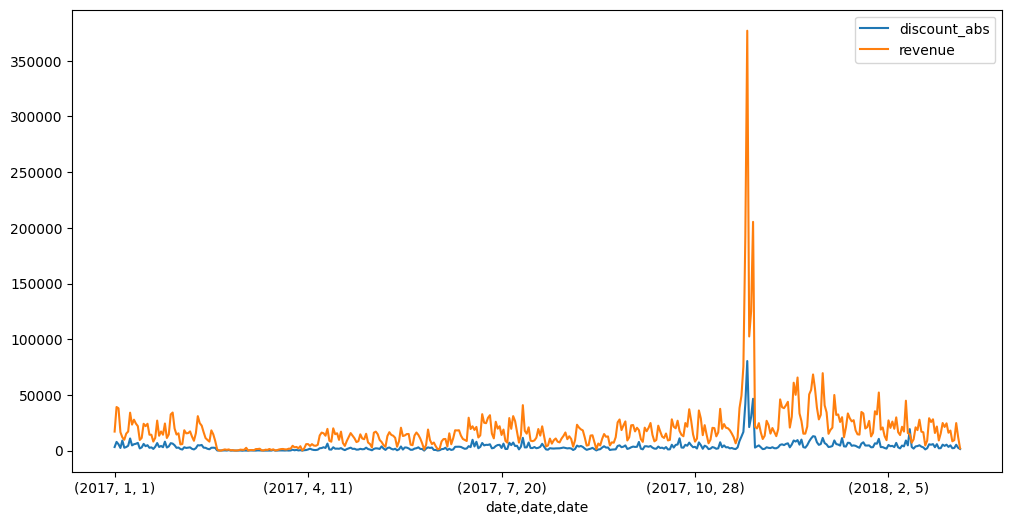

In [44]:
#to show discount over time
df_orderlines.groupby([df_orderlines.date.dt.year, df_orderlines.date.dt.month, df_orderlines.date.dt.day])[['discount_abs', 'revenue']].sum().plot(kind='line', figsize=(12,6))

#to show discount over time weekly
#df_orderlines.resample("W", on="date")[['discount_abs', 'revenue']].sum().plot(kind='line', figsize=(12,6))

#to show discount over time monthly
#df_orderlines.groupby([df_orderlines.date.dt.year, df_orderlines.date.dt.month])[['discount_abs', 'revenue']].sum().plot(kind='line', figsize=(12,6))

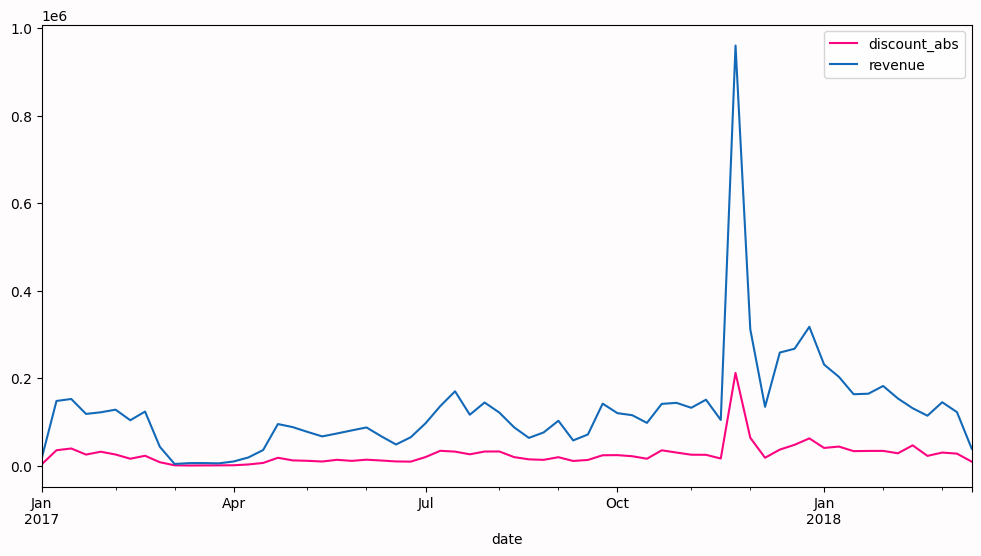

In [45]:
#weekly with diff colors and background for presentation
fig, ax = plt.subplots(figsize=(12,6))

# Set background color
fig.patch.set_facecolor("#fffcfe") # Background color for the entire figure
ax.set_facecolor("#fffcfe")  # Background color for the plot area

# Plot the data
df_orderlines.resample("W", on="date")[['discount_abs', 'revenue']].sum().plot(
    kind='line', ax=ax, color=["#fc037f", "#1269b7"]  # Custom line colors
)

plt.show()

<Axes: xlabel='date'>

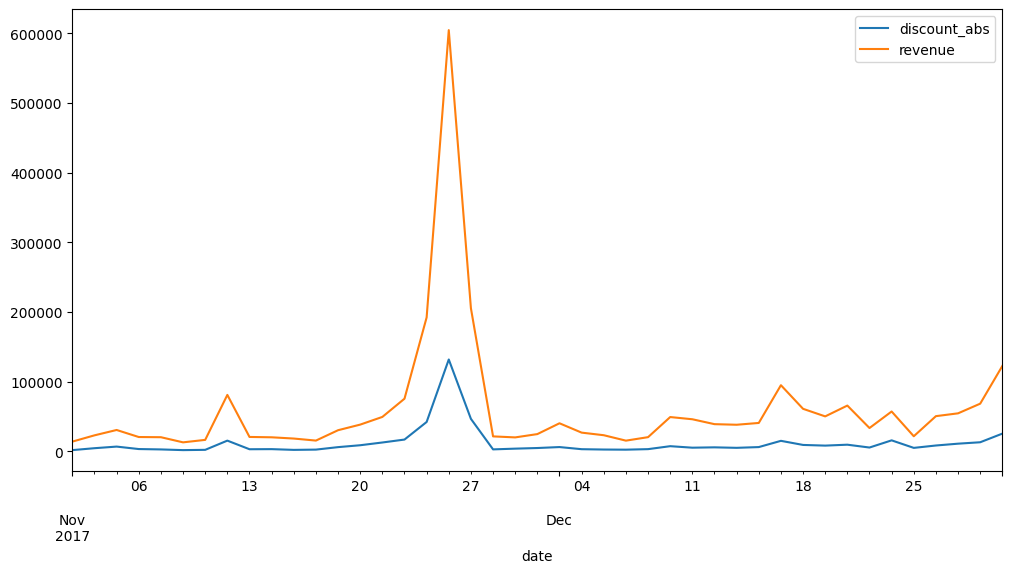

In [46]:
#closer to the black friday(24.11), we have peak on 26.11 Sunday
df_orderlines.loc[df_orderlines['date'].between('2017-11-01', '2018-01-01'),:].resample("B", on="date")[['discount_abs', 'revenue']].sum().plot(kind='line', figsize=(12,6))

<Axes: xlabel='discount_abs', ylabel='revenue'>

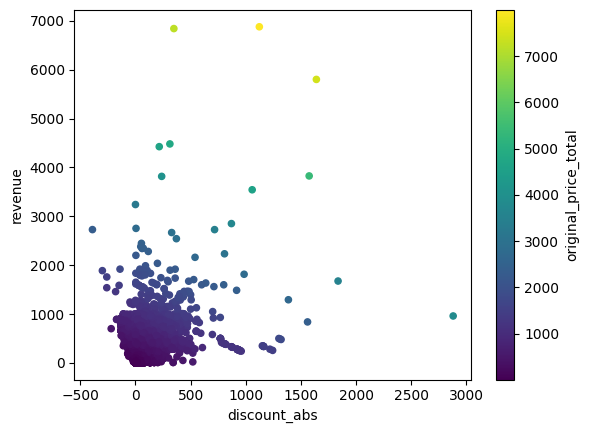

In [47]:
#revenue vs discount for each order
df_orderlines.plot.scatter(x='discount_abs',
                      y='revenue',
                           c='original_price_total')

In [48]:
#we have moderate positive corr between revenue and discount_abs (between 0.3 and 0.5)

df_orderlines.corr(method='pearson', numeric_only=True)

,id,order_id,product_quantity,unit_price,revenue,price,original_price_total,discount_abs,discount_%
id,1.00,0.99,-0.01,0.06,0.06,0.07,0.06,0.05,0.00
order_id,0.99,1.00,-0.01,0.06,0.06,0.07,0.06,0.04,-0.00
product_quantity,-0.01,-0.01,1.00,-0.04,0.21,-0.04,0.24,0.24,0.01
unit_price,0.06,0.06,-0.04,1.00,0.90,0.98,0.87,0.34,-0.33
revenue,0.06,0.06,0.21,0.90,1.00,0.88,0.98,0.43,-0.30
price,0.07,0.07,-0.04,0.98,0.88,1.00,0.89,0.51,-0.22
original_price_total,0.06,0.06,0.24,0.87,0.98,0.89,1.00,0.61,-0.20
discount_abs,0.05,0.04,0.24,0.34,0.43,0.51,0.61,1.00,0.27
discount_%,0.00,-0.00,0.01,-0.33,-0.30,-0.22,-0.20,0.27,1.00


In [49]:
#merge the column 'name'
df_orderlines = df_orderlines.merge(df_products[['sku', 'name']], how='left',left_on='sku', right_on='sku')

df_orderlines.groupby(['sku', 'name', 'price'])['product_quantity'].sum().sort_values(ascending=False).head(20)
df_orderlines

,id,order_id,product_quantity,sku,unit_price,date,revenue,price,original_price_total,discount_abs,discount_%,name
0,1119116,299545,1,OWC0100,47.49,2017-01-01 01:46:16,47.49,60.99,60.99,13.50,22.13,OWC In-line Digital Temperature Sensor Kit HDD...
1,1119119,299546,1,IOT0014,18.99,2017-01-01 01:50:34,18.99,22.95,22.95,3.96,17.25,iOttie Easy View 2 Car Black Support
2,1119120,295347,1,APP0700,72.19,2017-01-01 01:54:11,72.19,89.00,89.00,16.81,18.89,Apple 85W MagSafe 2 charger MacBook Pro screen...
3,1119134,299556,1,CRU0039-A,60.90,2017-01-01 02:20:14,60.90,76.99,76.99,16.09,20.90,(Open) Crucial 240GB SSD 7mm BX200
4,1119145,299561,1,PEB0015,142.49,2017-01-01 02:38:50,142.49,299.99,299.99,157.50,52.50,Pebble Smartwatch Time Steel Black
...,...,...,...,...,...,...,...,...,...,...,...,...
55315,1649474,525664,1,TUC0207,16.52,2018-03-14 11:45:05,16.52,24.99,24.99,8.47,33.89,Tucano Elements Second Skin Macbook Sleeve 12 ...
55316,1649512,527070,2,APP0698,9.99,2018-03-14 11:49:01,19.98,25.00,50.00,30.02,60.04,Apple Lightning Cable Connector to USB 1m Whit...
55317,1649522,527074,2,APP0698,9.99,2018-03-14 11:49:36,19.98,25.00,50.00,30.02,60.04,Apple Lightning Cable Connector to USB 1m Whit...
55318,1649565,527096,3,APP0698,9.99,2018-03-14 11:54:35,29.97,25.00,75.00,45.03,60.04,Apple Lightning Cable Connector to USB 1m Whit...


In [51]:
#create Dataframe with top20 and last 20 profitable products
top_20 = df_orderlines.groupby(['sku', 'name', 'price']).agg({'discount_%':'mean', 'revenue':'sum'}).sort_values(by=['revenue'], ascending=False).head(20)
last_20 = df_orderlines.groupby(['sku', 'name', 'price']).agg({'discount_%':'mean', 'revenue':'sum'}).sort_values(by=['revenue'], ascending=False).tail(20)
last_top_40 = pd.concat([top_20, last_20])
last_top_40

,,,discount_%,revenue
sku,name,price,,
LGE0044,"LG 27UD88-W Monitor 27 ""UHD 4K USB 3.0 USB-C",599.00,5.51,137410.33
APP2446,Apple iPhone 6 32GB Space Gray,449.33,13.81,104949.64
APP1922,AirPods Apple Bluetooth Headset for iPhone iPad iPod and Apple Watch,179.00,10.45,90224.92
APP2477,Apple iPhone 64GB Space Gray 8,809.00,2.66,87409.60
APP1970,Apple iPhone 32GB Space Gray,419.00,13.70,82426.03
APP2072,"Apple MacBook Air 13 ""Core i5 18GHz | 8GB RAM | 128GB SSD",1105.59,12.12,75764.89
APP2485,Apple iPhone 8 Plus 64GB Gold,919.00,3.42,73678.87
WDT0183,"Red 4TB WD 35 ""Mac PC hard drive and NAS",169.00,18.58,69410.40
APP2483,Apple iPhone 8 Plus 64GB Space Gray,919.00,3.07,61552.91


In [52]:
last_top_40.round()

,,,discount_%,revenue
sku,name,price,,
LGE0044,"LG 27UD88-W Monitor 27 ""UHD 4K USB 3.0 USB-C",599.00,6.00,137410.00
APP2446,Apple iPhone 6 32GB Space Gray,449.33,14.00,104950.00
APP1922,AirPods Apple Bluetooth Headset for iPhone iPad iPod and Apple Watch,179.00,10.00,90225.00
APP2477,Apple iPhone 64GB Space Gray 8,809.00,3.00,87410.00
APP1970,Apple iPhone 32GB Space Gray,419.00,14.00,82426.00
APP2072,"Apple MacBook Air 13 ""Core i5 18GHz | 8GB RAM | 128GB SSD",1105.59,12.00,75765.00
APP2485,Apple iPhone 8 Plus 64GB Gold,919.00,3.00,73679.00
WDT0183,"Red 4TB WD 35 ""Mac PC hard drive and NAS",169.00,19.00,69410.00
APP2483,Apple iPhone 8 Plus 64GB Space Gray,919.00,3.00,61553.00


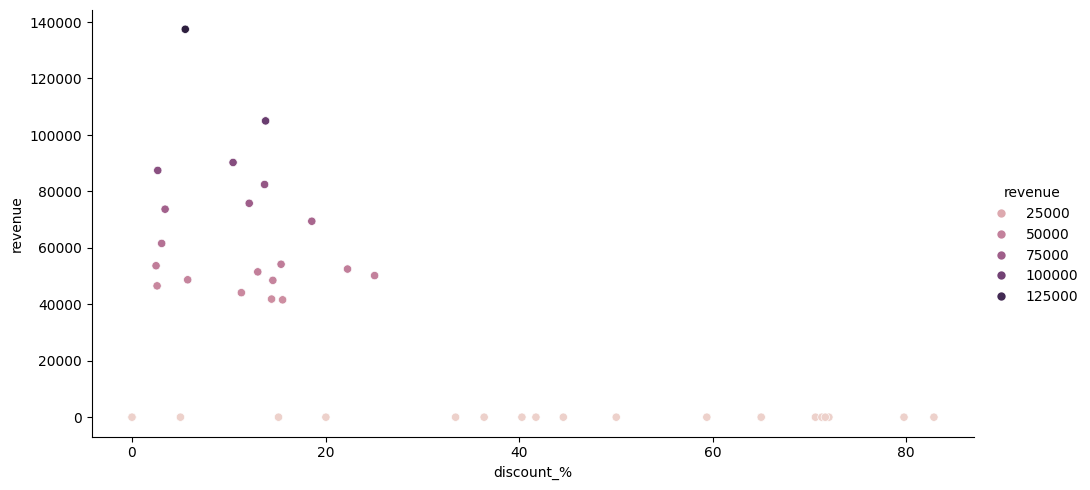

In [53]:
#scatterplot for those 40 products
import numpy as np
from matplotlib.ticker import FuncFormatter

sns.relplot(data=last_top_40,
           x="discount_%",
           y="revenue",
            hue='revenue',
            aspect=2);


In [54]:
#searching for the top/last 20 brands by Revenue
df_orderlines['short'] = df_orderlines["sku"].str[:3]
df_orderlines=df_orderlines.merge(df_brands[['short', 'long']], how='left', left_on='short', right_on='short')
df_orderlines

,id,order_id,product_quantity,sku,unit_price,date,revenue,price,original_price_total,discount_abs,discount_%,name,short,long
0,1119116,299545,1,OWC0100,47.49,2017-01-01 01:46:16,47.49,60.99,60.99,13.50,22.13,OWC In-line Digital Temperature Sensor Kit HDD...,OWC,OWC
1,1119119,299546,1,IOT0014,18.99,2017-01-01 01:50:34,18.99,22.95,22.95,3.96,17.25,iOttie Easy View 2 Car Black Support,IOT,iOttie
2,1119120,295347,1,APP0700,72.19,2017-01-01 01:54:11,72.19,89.00,89.00,16.81,18.89,Apple 85W MagSafe 2 charger MacBook Pro screen...,APP,Apple
3,1119134,299556,1,CRU0039-A,60.90,2017-01-01 02:20:14,60.90,76.99,76.99,16.09,20.90,(Open) Crucial 240GB SSD 7mm BX200,CRU,Crucial
4,1119145,299561,1,PEB0015,142.49,2017-01-01 02:38:50,142.49,299.99,299.99,157.50,52.50,Pebble Smartwatch Time Steel Black,PEB,Pebble
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55315,1649474,525664,1,TUC0207,16.52,2018-03-14 11:45:05,16.52,24.99,24.99,8.47,33.89,Tucano Elements Second Skin Macbook Sleeve 12 ...,TUC,Tucano
55316,1649512,527070,2,APP0698,9.99,2018-03-14 11:49:01,19.98,25.00,50.00,30.02,60.04,Apple Lightning Cable Connector to USB 1m Whit...,APP,Apple
55317,1649522,527074,2,APP0698,9.99,2018-03-14 11:49:36,19.98,25.00,50.00,30.02,60.04,Apple Lightning Cable Connector to USB 1m Whit...,APP,Apple
55318,1649565,527096,3,APP0698,9.99,2018-03-14 11:54:35,29.97,25.00,75.00,45.03,60.04,Apple Lightning Cable Connector to USB 1m Whit...,APP,Apple


In [55]:
#create Dataframe with top20 and last 20 profitable brands
first_brands_20 = df_orderlines.groupby('long', as_index=False).agg({'discount_%':'mean', 'revenue':'sum'}).sort_values(by=['revenue'], ascending=False).head(20)
last_brands_20 = df_orderlines.groupby('long', as_index=False).agg({'discount_%':'mean', 'revenue':'sum'}).sort_values(by=['revenue'], ascending=False).tail(20)
brands_40 = pd.concat([first_brands_20, last_brands_20])
brands_40

,long,discount_%,revenue
5,Apple,16.73,2676002.90
107,Pack,26.26,489911.59
100,OWC,22.59,471842.92
67,LaCie,11.83,464822.90
162,Western Digital,18.45,378783.37
65,LG,10.41,333974.64
19,Crucial,13.85,290069.11
161,Wacom,20.04,280690.65
24,Dell,17.44,269296.79
145,Synology,2.77,175191.58


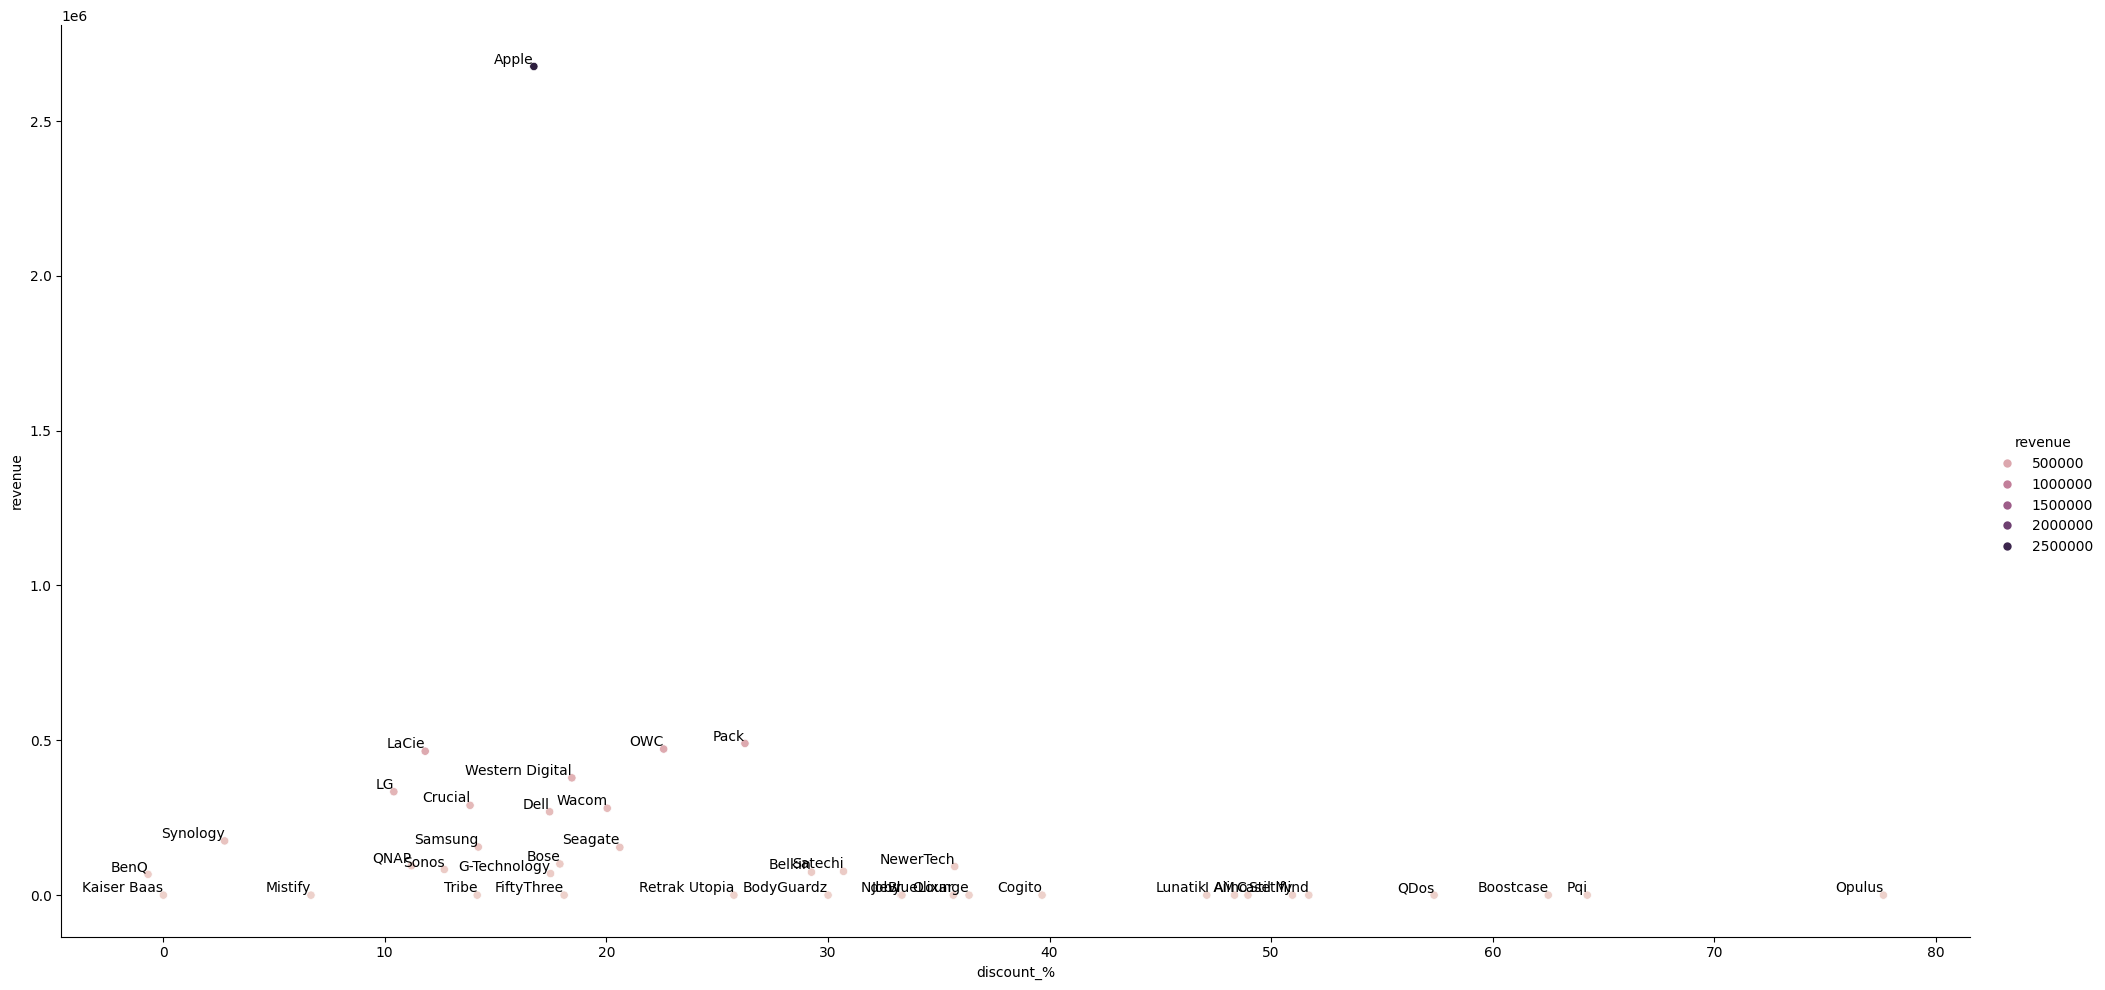

In [56]:
#scatterplot for 40 brands
g=sns.relplot(data=brands_40,
           x="discount_%",
           y="revenue",
            hue='revenue',
            aspect=2,
            height=10);
ax = g.ax

# Add labels (brand names) to each point
for i, row in brands_40.iterrows():
    ax.text(row['discount_%'], row['revenue'], row['long'],
            fontsize=10, ha='right', va='bottom')

plt.show()

In [57]:
#divide all product items into category
# create column category
df_products["category"] = ""


# assign our defined categories (see pdf)
df_products.loc[df_products["type"].isin(["14305406","5720","24215399","12645406","5,49E+11","8696","21485407","11865403","12635403","13835403","12585395","1296","1325","5384","5398","2449","1229","12995397","1515","13615399","13555403","1230","118692158","1216"]), "category"] += "accessories"
df_products.loc[df_products["type"].isin(["1282","5,74E+15","1,02E+12","2158","2,17E+11","5,39E+11","2,16E+11"]), "category"] += "computers"
df_products.loc[df_products["type"].isin(["1405"]), "category"] += "tablets"
df_products.loc[df_products["type"].isin(["1298","51601716","85651716"]), "category"] += "second hand"
df_products.loc[df_products["type"].isin(["1,44E+11"]), "category"] += "repair"
df_products.loc[df_products["type"].isin(["11905404","1392","9094"]), "category"] += "smart home & outdoor appliances"
df_products.loc[df_products["type"].isin(["12175397","11935397","1364","1433","12215397","57445397","12655397","42945397"]), "category"] += "data storage"
df_products.loc[df_products["type"].isin(["24885185","24895185"]), "category"] += "watches"
df_products.loc[df_products["type"].isin(["11821715"]), "category"] += "iPods"

df_products["category"].value_counts()
# create DataFrame with products without a category
df_other_products = df_products[df_products["category"] == ""]
df_other_products
# check dataframe for following key words:
# accessories: case|usb|dock|adapter|cable|monitor|hmdi|dvi|headphones|headset|earbuds|ear buds|speaker|strap|pen|pointer|keyboard|mouse|cover|housing|screen|charger|charging|armband|battery|keypad|thunderbolt|power bank
# computers: macbook|desktop
# tablets: tablet|ipad
# smartphones: apple iphone
# second hand: open|like new|well|very good
# repair: repair
# data storage: nas|storage|memory|ssd|flash drive|hard drive
# SOA: backpack|security|camera|car|homekit
# watch: watch
df_other_products.loc[df_other_products["name"].str.contains("case|usb|dock|adapter|cable|monitor|hmdi|dvi|headphones|headset|earbuds|ear buds|speaker|strap|pen|pointer|keyboard|mouse|cover|housing|screen|charger|charging|armband|battery|keypad|thunderbolt|power bank", case=False), "category"] += ", accessories"
df_other_products.loc[df_other_products["desc"].str.contains("case|usb|dock|adapter|cable|monitor|hmdi|dvi|headphones|headset|earbuds|ear buds|speaker|strap|pen|pointer|keyboard|mouse|cover|housing|screen|charger|charging|armband|battery|keypad|thunderbolt|power bank", case=False), "category"] += ", accessories"
df_other_products.loc[df_other_products["desc"].str.contains("watch", case=False), "category"] += ", watch"
df_other_products.loc[df_other_products["name"].str.contains("apple iphone", case=False), "category"] += ", smartphone"
df_other_products.loc[df_other_products["desc"].str.contains("apple iphone", case=False), "category"] += ", smartphone"
df_other_products.loc[df_other_products["name"].str.contains("macbook|desktop", case=False), "category"] += ", computer"
df_other_products.loc[df_other_products["desc"].str.contains("macbook|desktop", case=False), "category"] += ", computer"
df_other_products.loc[df_other_products["name"].str.contains("tablet|ipad", case=False), "category"] += ", tablet"
df_other_products.loc[df_other_products["desc"].str.contains("tablet|ipad", case=False), "category"] += ", tablet"
df_other_products.loc[df_other_products["name"].str.contains("open|like new|well|very good|second hand|refurbished ", case=False), "category"] += ", second hand"
df_other_products.loc[df_other_products["desc"].str.contains("open|like new|well|very good|second hand|refurbished ", case=False), "category"] += ", second hand"
df_other_products.loc[df_other_products["name"].str.contains("repair", case=False), "category"] += ", repair"
df_other_products.loc[df_other_products["desc"].str.contains("repair", case=False), "category"] += ", repair"
df_other_products.loc[df_other_products["name"].str.contains("backpack|security|camera|car|homekit", case=False), "category"] += ", SOA"
df_other_products.loc[df_other_products["desc"].str.contains("backpack|security|camera|car|homekit", case=False), "category"] += ", SOA"
df_other_products.loc[df_other_products["name"].str.contains("nas|storage|memory|ssd|flash drive|hard drive", case=False), "category"] += ", data storage"
df_other_products.loc[df_other_products["desc"].str.contains("nas|storage|memory|ssd|flash drive|hard drive", case=False), "category"] += ", data storage"
df_other_products["category"].value_counts()
# rename unambiguous categories
mapping = {', computer':'computers',
            ', computer, computer':'computers',
            ', smartphone, smartphone':'smartphones',
           ', smartphone':'smartphones',
           ', watch':'watches',
            ', watch, watch':'watches',
           ', SOA':'smart home & outdoor appliances',
            ', SOA, SOA' : 'smart home & outdoor appliances',
           ', data storage':'data storage',
            ', data storage, data storage':'data storage'}
for old_cat, new_cat in mapping.items():
  df_other_products.loc[df_other_products['category'] == old_cat, 'category'] = new_cat
# rename those mixed categories where certain categories are prioritised (important to do this after the initial renaming!)
df_other_products.loc[df_other_products['category'].str.contains('second hand', case=False), 'category'] = 'second hand'
df_other_products.loc[df_other_products['category'].str.contains('repair', case=False), 'category'] = 'repair'
df_other_products.loc[df_other_products['category'].str.contains('accessories', case=False), 'category'] = 'accessories'
df_other_products.loc[df_other_products['category'].str.contains('tablet', case=False), 'category'] = 'tablets'
df_other_products.loc[df_other_products['category'].str.contains('watch', case=False), 'category'] = 'watches'
df_other_products.loc[df_other_products['category'].str.contains('SOA', case=False), 'category'] = 'other'
df_other_products.loc[df_other_products['category'].str.contains('data storage', case=False), 'category'] = 'other'

# name the rest "other"
df_other_products.loc[df_other_products['category'] == "", 'category'] = 'other'
# merge df_products and _other_products
df_merged = pd.merge(df_products, df_other_products, on='sku', how='left', suffixes=('', '_new'))
# update original dataframe with the merge
df_products['category'] = df_merged['category_new'].fillna(df_merged['category'])

df_products


,sku,name,desc,price,in_stock,type,category
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,accessories
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,0,13855401,accessories
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,0,1387,accessories
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,0,1230,accessories
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,1,1364,data storage
...,...,...,...,...,...,...,...
9987,BEL0376,Belkin Travel Support Apple Watch Black,compact and portable stand vertically or horiz...,29.99,1,12282,watches
9988,THU0060,"Enroute Thule 14L Backpack MacBook 13 ""Black",Backpack with capacity of 14 liter compartment...,69.95,1,1392,smart home & outdoor appliances
9989,THU0061,"Enroute Thule 14L Backpack MacBook 13 ""Blue",Backpack with capacity of 14 liter compartment...,69.95,1,1392,smart home & outdoor appliances
9990,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red",Backpack with capacity of 14 liter compartment...,69.95,0,1392,smart home & outdoor appliances


In [58]:
#check revenue vs discount for each category
#merging 'category' into orderlines table
df_orderlines = df_orderlines.merge(df_products[['sku', 'category']], how='left',left_on='sku', right_on='sku')
df_orderlines

,id,order_id,product_quantity,sku,unit_price,date,revenue,price,original_price_total,discount_abs,discount_%,name,short,long,category
0,1119116,299545,1,OWC0100,47.49,2017-01-01 01:46:16,47.49,60.99,60.99,13.50,22.13,OWC In-line Digital Temperature Sensor Kit HDD...,OWC,OWC,other
1,1119119,299546,1,IOT0014,18.99,2017-01-01 01:50:34,18.99,22.95,22.95,3.96,17.25,iOttie Easy View 2 Car Black Support,IOT,iOttie,accessories
2,1119120,295347,1,APP0700,72.19,2017-01-01 01:54:11,72.19,89.00,89.00,16.81,18.89,Apple 85W MagSafe 2 charger MacBook Pro screen...,APP,Apple,accessories
3,1119134,299556,1,CRU0039-A,60.90,2017-01-01 02:20:14,60.90,76.99,76.99,16.09,20.90,(Open) Crucial 240GB SSD 7mm BX200,CRU,Crucial,second hand
4,1119145,299561,1,PEB0015,142.49,2017-01-01 02:38:50,142.49,299.99,299.99,157.50,52.50,Pebble Smartwatch Time Steel Black,PEB,Pebble,smart home & outdoor appliances
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55315,1649474,525664,1,TUC0207,16.52,2018-03-14 11:45:05,16.52,24.99,24.99,8.47,33.89,Tucano Elements Second Skin Macbook Sleeve 12 ...,TUC,Tucano,accessories
55316,1649512,527070,2,APP0698,9.99,2018-03-14 11:49:01,19.98,25.00,50.00,30.02,60.04,Apple Lightning Cable Connector to USB 1m Whit...,APP,Apple,accessories
55317,1649522,527074,2,APP0698,9.99,2018-03-14 11:49:36,19.98,25.00,50.00,30.02,60.04,Apple Lightning Cable Connector to USB 1m Whit...,APP,Apple,accessories
55318,1649565,527096,3,APP0698,9.99,2018-03-14 11:54:35,29.97,25.00,75.00,45.03,60.04,Apple Lightning Cable Connector to USB 1m Whit...,APP,Apple,accessories


In [59]:
#grouping discount and revenue by category
by_category = df_orderlines.groupby('category', as_index=False).agg({'discount_%':'mean', 'revenue':'sum'}).sort_values(by=['revenue'], ascending=False)
by_category

,category,discount_%,revenue
2,data storage,16.23,2772182.84
0,accessories,25.70,2128995.72
6,second hand,23.46,775859.37
8,smartphones,3.57,754986.68
9,tablets,16.66,637014.18
7,smart home & outdoor appliances,23.14,407605.39
1,computers,17.48,239530.89
10,watches,6.01,219245.83
4,other,18.88,131306.94
3,iPods,13.25,15898.73


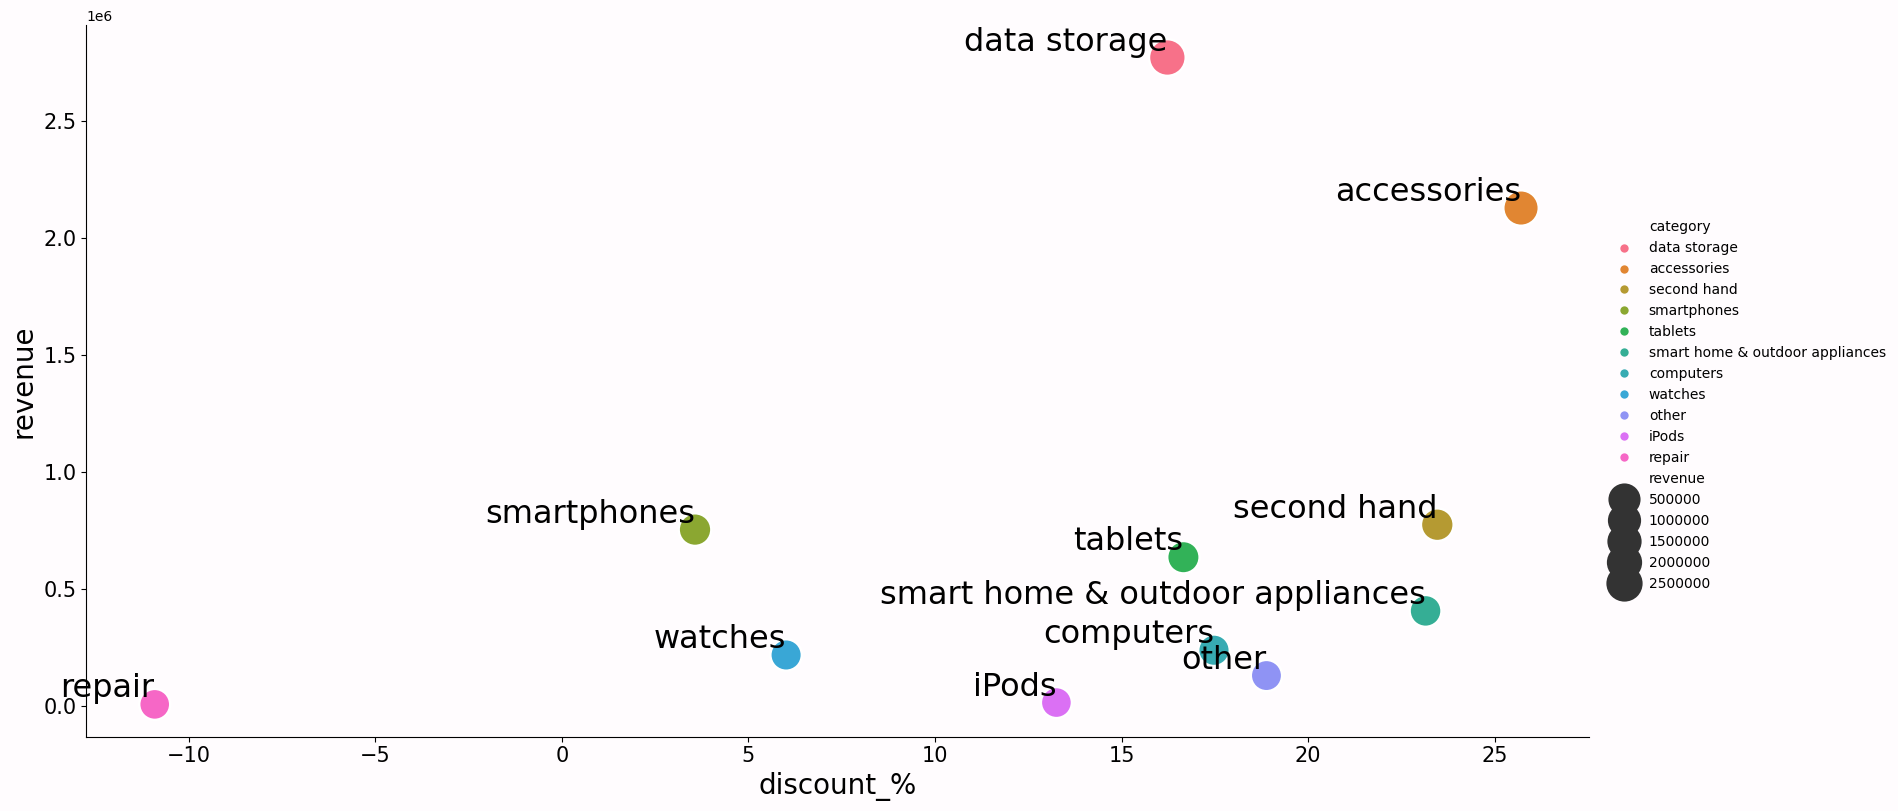

In [61]:
#creating plot by category for presentation
g=sns.relplot(
           data=by_category,
           x="discount_%",
           y="revenue",
           hue='category',
           size='revenue',
           sizes=(500, 700),
           aspect=2,
           height=8);
ax = g.ax

# Set background color for the entire figure (outside the plot)
g.figure.set_facecolor("#fffcfe")

# Loop through all subplots to set background inside the plot
for ax in g.axes.flat:
    ax.set_facecolor("#fffcfe")  # Background inside plot

    # Add labels (category) to each point
    for i, row in by_category.iterrows():
        ax.text(row['discount_%'], row['revenue'], row['category'],
                fontsize=23, ha='right', va='bottom')


    # Increase font size of axis labels
    ax.set_xlabel("discount_%", fontsize=20)  # Adjust X-axis label size
    ax.set_ylabel("revenue", fontsize=20)       # Adjust Y-axis label size
    ax.tick_params(axis='both', labelsize=15)   # Adjust tick label size

plt.show()

In [62]:
#creating revenue label ("Lowest", "middle", 'highest') for each item by total revenue
grouped_revenue = df_orderlines.groupby('sku')['revenue'].sum().reset_index()
grouped_revenue['revenue_label'] = pd.qcut(grouped_revenue['revenue'], q=3, labels=['Lowest', 'Middle', 'Highest'])
grouped_revenue


,sku,revenue,revenue_label
0,8MO0001-A,12.96,Lowest
1,8MO0003-A,12.85,Lowest
2,8MO0007,155.93,Middle
3,8MO0008,235.89,Middle
4,8MO0009,87.37,Lowest
...,...,...,...
5163,ZAG0041,19.99,Lowest
5164,ZAG0042,19.99,Lowest
5165,ZEP0007,125.99,Middle
5166,ZEP0008,104.12,Lowest


In [63]:
#merge with main table
df_orderlines = df_orderlines.merge(grouped_revenue[['sku','revenue_label']], how='left',left_on='sku', right_on='sku')
df_orderlines

,id,order_id,product_quantity,sku,unit_price,date,revenue,price,original_price_total,discount_abs,discount_%,name,short,long,category,revenue_label
0,1119116,299545,1,OWC0100,47.49,2017-01-01 01:46:16,47.49,60.99,60.99,13.50,22.13,OWC In-line Digital Temperature Sensor Kit HDD...,OWC,OWC,other,Highest
1,1119119,299546,1,IOT0014,18.99,2017-01-01 01:50:34,18.99,22.95,22.95,3.96,17.25,iOttie Easy View 2 Car Black Support,IOT,iOttie,accessories,Middle
2,1119120,295347,1,APP0700,72.19,2017-01-01 01:54:11,72.19,89.00,89.00,16.81,18.89,Apple 85W MagSafe 2 charger MacBook Pro screen...,APP,Apple,accessories,Highest
3,1119134,299556,1,CRU0039-A,60.90,2017-01-01 02:20:14,60.90,76.99,76.99,16.09,20.90,(Open) Crucial 240GB SSD 7mm BX200,CRU,Crucial,second hand,Lowest
4,1119145,299561,1,PEB0015,142.49,2017-01-01 02:38:50,142.49,299.99,299.99,157.50,52.50,Pebble Smartwatch Time Steel Black,PEB,Pebble,smart home & outdoor appliances,Highest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55315,1649474,525664,1,TUC0207,16.52,2018-03-14 11:45:05,16.52,24.99,24.99,8.47,33.89,Tucano Elements Second Skin Macbook Sleeve 12 ...,TUC,Tucano,accessories,Middle
55316,1649512,527070,2,APP0698,9.99,2018-03-14 11:49:01,19.98,25.00,50.00,30.02,60.04,Apple Lightning Cable Connector to USB 1m Whit...,APP,Apple,accessories,Highest
55317,1649522,527074,2,APP0698,9.99,2018-03-14 11:49:36,19.98,25.00,50.00,30.02,60.04,Apple Lightning Cable Connector to USB 1m Whit...,APP,Apple,accessories,Highest
55318,1649565,527096,3,APP0698,9.99,2018-03-14 11:54:35,29.97,25.00,75.00,45.03,60.04,Apple Lightning Cable Connector to USB 1m Whit...,APP,Apple,accessories,Highest


<Axes: xlabel='date'>

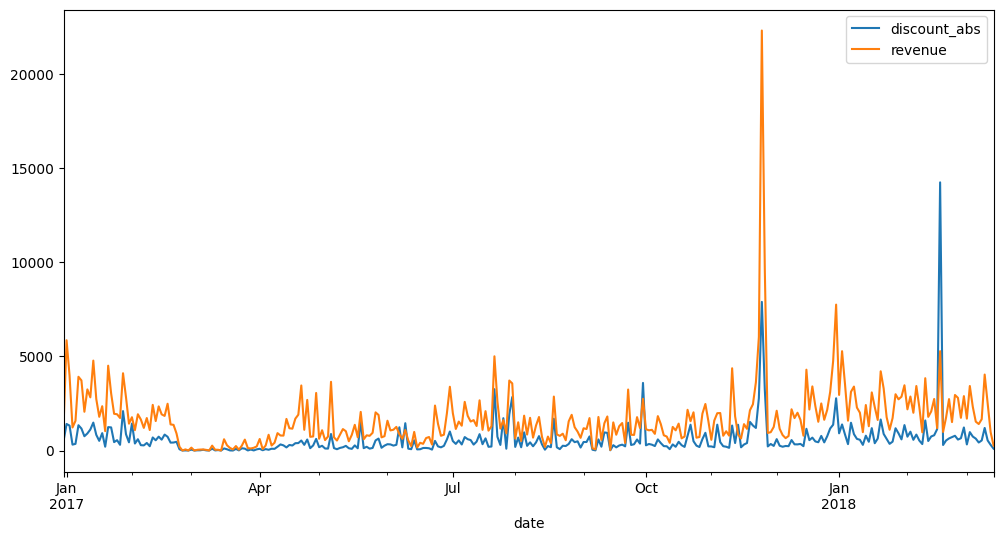

In [ ]:
#make plot revenue vs discount for each Revenue labels
df_orderlines.loc[df_orderlines['revenue_label'] =='Middle'].resample("B", on="date")[['discount_abs', 'revenue']].sum().plot(kind='line', figsize=(12,6))


#df_orderlines.loc[df_orderlines['revenue_label'] =='Lowest'].resample("B", on="date")[['discount_abs', 'revenue']].sum().plot(kind='line', figsize=(12,6))
#df_orderlines.loc[df_orderlines['revenue_label'] =='Highest'].resample("B", on="date")[['discount_abs', 'revenue']].sum().plot(kind='line', figsize=(12,6))

<Axes: xlabel='date'>

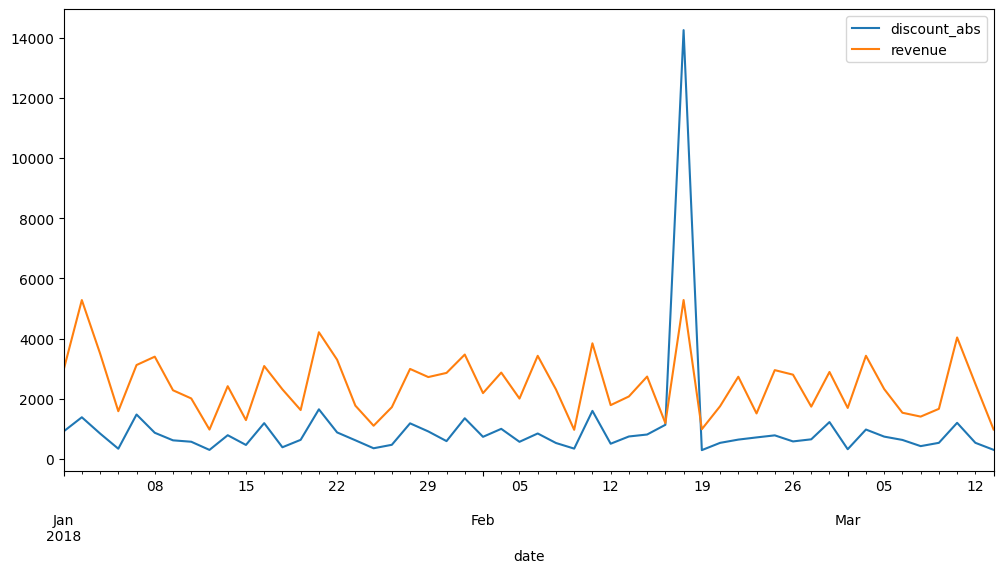

In [64]:
#when we gave too high discount
df_orderlines.loc[(df_orderlines['revenue_label'] =='Middle') & (df_orderlines['date'].between('2018-01-01', '2018-03-14'))].resample("B", on="date")[['discount_abs', 'revenue']].sum().plot(kind='line', figsize=(12,6))

In [65]:
# during this time we have lost in Middle segment 6.986
df_orderlines.loc[(df_orderlines['revenue_label'] =='Middle') & (df_orderlines['date'].between('2018-02-14', '2018-02-19'))][['discount_abs', 'revenue']].sum()

,0
discount_abs,16197.83
revenue,9211.02


In [66]:
#which was   15,5 % of the monthly Revenue for February in this segment
df_orderlines.loc[(df_orderlines['revenue_label'] =='Middle') & (df_orderlines['date'].between('2018-02-01', '2018-02-28'))][['discount_abs', 'revenue']].sum()

,0
discount_abs,27277.47
revenue,45166.06


In [67]:
# on avg discount for revenue groups
df_orderlines.groupby('revenue_label')['discount_%'].mean()

,discount_%
revenue_label,
Lowest,28.74
Middle,25.04
Highest,19.99


# Showing for each category the range for discount for growing Revenue


In [70]:
# add date columns needed for time x discount analysis
df_orderlines.loc[:,"month"] = df_orderlines["date"].dt.month
df_orderlines.loc[:,"quarter"] = df_orderlines["date"].dt.quarter
df_orderlines.loc[:,"year"] = df_orderlines["date"].dt.year
df_orderlines

,id,order_id,product_quantity,sku,unit_price,date,revenue,price,original_price_total,discount_abs,discount_%,name,short,long,category,revenue_label,month,quarter,year
0,1119116,299545,1,OWC0100,47.49,2017-01-01 01:46:16,47.49,60.99,60.99,13.50,22.13,OWC In-line Digital Temperature Sensor Kit HDD...,OWC,OWC,other,Highest,1,1,2017
1,1119119,299546,1,IOT0014,18.99,2017-01-01 01:50:34,18.99,22.95,22.95,3.96,17.25,iOttie Easy View 2 Car Black Support,IOT,iOttie,accessories,Middle,1,1,2017
2,1119120,295347,1,APP0700,72.19,2017-01-01 01:54:11,72.19,89.00,89.00,16.81,18.89,Apple 85W MagSafe 2 charger MacBook Pro screen...,APP,Apple,accessories,Highest,1,1,2017
3,1119134,299556,1,CRU0039-A,60.90,2017-01-01 02:20:14,60.90,76.99,76.99,16.09,20.90,(Open) Crucial 240GB SSD 7mm BX200,CRU,Crucial,second hand,Lowest,1,1,2017
4,1119145,299561,1,PEB0015,142.49,2017-01-01 02:38:50,142.49,299.99,299.99,157.50,52.50,Pebble Smartwatch Time Steel Black,PEB,Pebble,smart home & outdoor appliances,Highest,1,1,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55315,1649474,525664,1,TUC0207,16.52,2018-03-14 11:45:05,16.52,24.99,24.99,8.47,33.89,Tucano Elements Second Skin Macbook Sleeve 12 ...,TUC,Tucano,accessories,Middle,3,1,2018
55316,1649512,527070,2,APP0698,9.99,2018-03-14 11:49:01,19.98,25.00,50.00,30.02,60.04,Apple Lightning Cable Connector to USB 1m Whit...,APP,Apple,accessories,Highest,3,1,2018
55317,1649522,527074,2,APP0698,9.99,2018-03-14 11:49:36,19.98,25.00,50.00,30.02,60.04,Apple Lightning Cable Connector to USB 1m Whit...,APP,Apple,accessories,Highest,3,1,2018
55318,1649565,527096,3,APP0698,9.99,2018-03-14 11:54:35,29.97,25.00,75.00,45.03,60.04,Apple Lightning Cable Connector to USB 1m Whit...,APP,Apple,accessories,Highest,3,1,2018


In [71]:
# add the time combination needed for plotting
df_orderlines["yr_qu"] = df_orderlines["year"].astype(str).str.cat(df_orderlines["quarter"].astype(str), sep="/")["yr_qu"] = df_orderlines["year"].astype(str).str.cat(df_orderlines["quarter"].astype(str), sep="/")

In [73]:
# add bins and labels for discount categories
bins = [0, 1, 10, 20, 40, float('inf')]  # limits of discount categories
labels = ['0-1%', '1-10%', '10-20%', '20-40%', '40%+']

In [74]:
# add discount category column
df_orderlines['disc_cat'] = pd.cut(df_orderlines['discount_%'], bins=bins, labels=labels, right=False)['disc_cat'] = pd.cut(df_orderlines['discount_%'], bins=bins, labels=labels, right=False)

In [76]:
# filter out discount %s < 0
pl_filtered = df_orderlines.loc[(df_orderlines['discount_%'] >= 0)].loc[(df_orderlines['discount_%'] >= 0)]

In [77]:
# get the sum of revenue per product category, quarter of each year & discount category into a separate data frame
df_combined=pl_filtered.groupby(['category', 'yr_qu','disc_cat']).agg({'revenue': 'sum'}).round()

In [78]:
# define separate data frames for each product category to plot separately
accessories_df = df_combined[df_combined.index.get_level_values('category') == 'accessories'].reset_index(['category','yr_qu','disc_cat'])
dstorage_df = df_combined[df_combined.index.get_level_values('category') == 'data storage'].reset_index(['category','yr_qu','disc_cat'])
comp_df = df_combined[df_combined.index.get_level_values('category') == 'computers'].reset_index(['category','yr_qu','disc_cat'])
tab_df = df_combined[df_combined.index.get_level_values('category') == 'tablets'].reset_index(['category','yr_qu','disc_cat'])
sechand_df = df_combined[df_combined.index.get_level_values('category') == 'second hand'].reset_index(['category','yr_qu','disc_cat'])
repair_df = df_combined[df_combined.index.get_level_values('category') == 'repair'].reset_index(['category','yr_qu','disc_cat'])
soa_df = df_combined[df_combined.index.get_level_values('category') == 'smart home & outdoor appliances'].reset_index(['category','yr_qu','disc_cat'])
oth_df = df_combined[df_combined.index.get_level_values('category') == 'other'].reset_index(['category','yr_qu','disc_cat'])
phone_df = df_combined[df_combined.index.get_level_values('category') == 'smartphones'].reset_index(['category','yr_qu','disc_cat'])
pod_df = df_combined[df_combined.index.get_level_values('category') == 'iPods'].reset_index(['category','yr_qu','disc_cat'])
watch_df = df_combined[df_combined.index.get_level_values('category') == 'watches'].reset_index(['category','yr_qu','disc_cat'])

In [79]:
# define data frames with categories of similar discount-revenue patterns
# 1-10%
cats = ['tablets', 'smartphones', 'iPods', 'watches']  # categories here
ten_df = df_combined[df_combined.index.get_level_values('category').isin(cats)].reset_index(['category','yr_qu','disc_cat'])
# 10-20%
cats = ['data storage', 'computers', 'second hand', 'accessories','smart home & outdoor appliances','other']  # categories here
twenty_df = df_combined[df_combined.index.get_level_values('category').isin(cats)].reset_index(['category','yr_qu','disc_cat'])

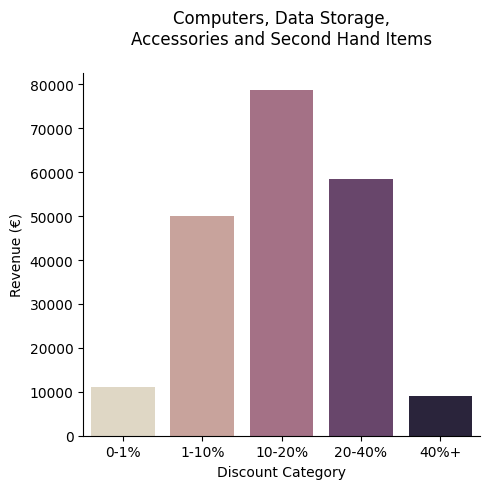

In [80]:
# insert data frame for bar plot (over all time points) here
g = sns.catplot(kind="bar",
            data=twenty_df,
            x="disc_cat",
            y="revenue",
            hue="disc_cat",
            palette="ch:s=-.2,r=.6",
            ci=None)  # removing the error bars

g.set_axis_labels("Discount Category", "Revenue (€)")  # set axis labels
g.set(title="Computers, Data Storage,\nAccessories and Second Hand Items\n") # set title (optional)

plt.tight_layout() # for better legibility
plt.show()

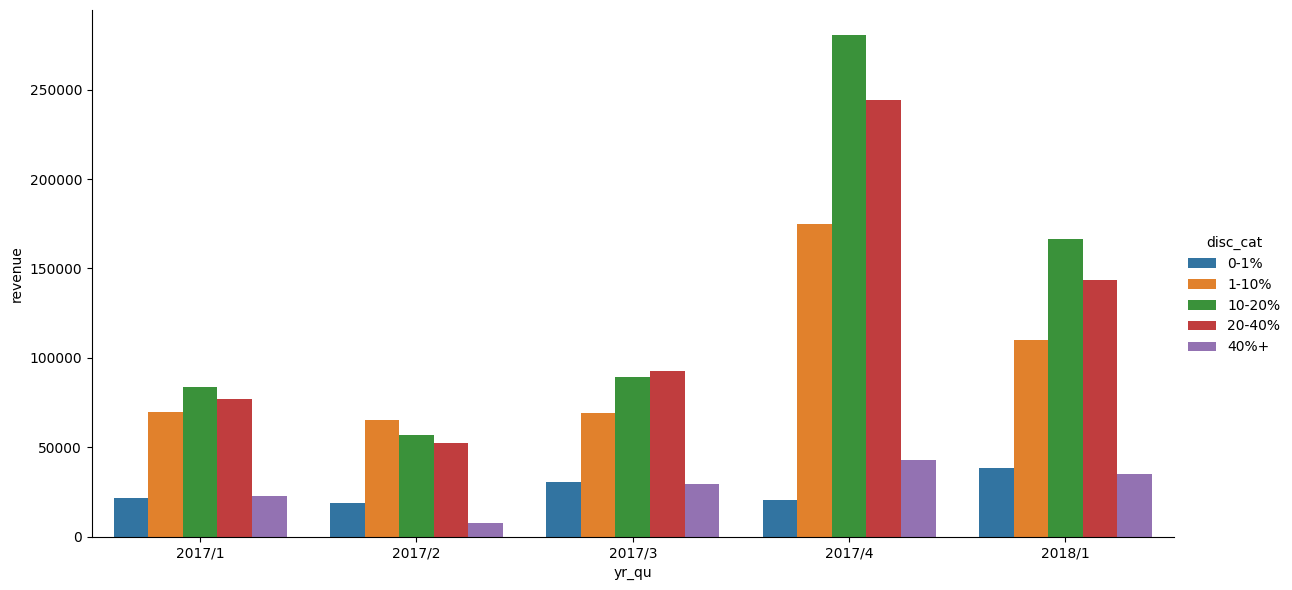

In [81]:
# optional plot for checking the discount patterns per quarter
sns.catplot(kind="bar",
            data=accessories_df,
            x="yr_qu",
            y="revenue",
            hue="disc_cat",
            height=6,
            aspect=2);

In [ ]:
#